In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Changing direction to access input files

In [1]:
pwd

'/home/grace/Documents/python/ttc_exclusions/notebooks'

In [2]:
raw_dir = '/home/grace/Documents/python/ttc_exclusions/data/raw/'
processed_dir = '/home/grace/Documents/python/ttc_exclusions/data/processed/'
figures_dir = '/home/grace/Documents/python/ttc_exclusions/reports/figures/'

Accessing the LRI dataset of 45000 substances

In [5]:
lri = pd.read_csv(raw_dir+'LRI_TTC_updated_180719.csv')

In [7]:
lri.head()

,casrn,DTXSID,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,ttc_class,kroes_decision,small_httk,large_cerapp,mark_ttc_class,reason_for_NA,old_ttc_class
0,72-20-8,DTXSID6020561,Endrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000291,0.002280,0.000003,Genotoxicity Alert,Negligible risk (low probability of a life-tim...,YES,NO,Genotoxicity Alert,NaN,Genotoxicity Alert
1,60-57-1,DTXSID9020453,Dieldrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000553,0.009572,0.000003,Genotoxicity Alert,Negligible risk (low probability of a life-tim...,YES,NO,Genotoxicity Alert,NaN,Genotoxicity Alert
2,87818-31-3,DTXSID3034456,Cinmethylin,CC(C)C12CCC(C)(O1)C(C2)OCC1=C(C)C=CC=C1,99,NaN,0.050130,0.445990,0.001500,Cramer Class III,Substance would not be expected to be a safety...,YES,NO,Class III,NaN,Class III
3,76738-62-0,DTXSID2024242,Paclobutrazol,CC(C)(C)C(O)C(CC1=CC=C(Cl)C=C1)N1C=NC=N1,99,NaN,0.239110,2.872300,0.001500,Cramer Class III,Substance would not be expected to be a safety...,YES,NO,Class III,NaN,Class III
4,87674-68-8,DTXSID4032376,Dimethenamid,COCC(C)N(C(=O)CCl)C1=C(C)SC=C1C,99,NaN,1.564200,15.084000,0.000003,Genotoxicity Alert,Negligible risk (low probability of a life-tim...,YES,NO,Genotoxicity Alert,NaN,Genotoxicity Alert


Creating a dict of the IDs and the smiles to prepare a dict of molecules using RDkit

In [12]:
lri_dict = { k:v for (k,v) in zip(lri['DTXSID'], lri['smiles'])}

In [17]:
len(lri_dict)

45038

In [14]:
lri_smiles = {k:Chem.MolFromSmiles(v) for k,v in lri_dict.items()}

RDKit ERROR: [18:32:28] Explicit valence for atom # 2 Br, 3, is greater than permitted


In [16]:
len(lri_smiles)

45038

Accessing the cohort of concern that is specified in FDA's SOP - this includes the usual COC that are outlined in the Kroes workflow plus several others. Compiled a list based on the Enoch et al (2011) DNA alerts and the Benigni Bossa alerts in addition to a handful of additional SMARTs either reflected in the Kroes workflow or added by me for dioxin like substances

In [8]:
coc = pd.ExcelFile(raw_dir+'FDA_COC.xlsx')

In [9]:
coc.sheet_names

['FDA_COC']

In [10]:
fda_coc = coc.parse('FDA_COC')

In [11]:
fda_coc.head()

,COC,SMARTS,Name,Source,TTC_Cat
0,Triazines,"c1nc([F,Cl,Br,I,$(N(=O)=O)])ncn1",Halo- or nitro s-triazines,ochem,New_COC
1,Triazines,[N]=[N]-[N],Azide and triazene groups,SA22_gen,New_COC
2,Triazines,[N]=[N]=[N],Azide and triazene groups,SA22_gen,New_COC
3,Triazines,"[NH2,$([NH](N=N)[#6]),$(N(N=N)([#6])[#6])]N=N[...",NaN,Triazines-(SN1),New_COC
4,Triazines,"[$([NX2!R]=[NX2!R][NX3!R]),$([NX2]=[NX2+]=[NX1...",NaN,ochem,New_COC


In [20]:
fda_dict = {}
for i,group in fda_coc.groupby('COC'):
    key = [name for name in group['COC'] if name!=' '][0]
    value = set(group['SMARTS'])
    fda_dict[key]=value

In [23]:
len(fda_dict)

17

In [22]:
fda_smarts = {k:[Chem.MolFromSmarts(e) for e in v] for k,v in fda_dict.items()}

RDKit ERROR: [18:39:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: tgt
RDKit ERROR: Violation occurred on line 155 in file /opt/conda/conda-bld/rdkit_1528088207908/work/Code/GraphMol/QueryOps.cpp
RDKit ERROR: Failed Expression: 3 <= 0 <= 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [18:39:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: tgt
RDKit ERROR: Violation occurred on line 155 in file /opt/conda/conda-bld/rdkit_1528088207908/work/Code/GraphMol/QueryOps.cpp
RDKit ERROR: Failed Expression: 3 <= 0 <= 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [18:39:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: tgt
RDKit ERROR: Violation occurred on line 155 in file /opt/conda/conda-bld/rdkit_1528088207908/work/Code/GraphMol/QueryOps.cpp
RDKit ERROR: Failed Expression: 3 <= 0 <= 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [18:39:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: tg

In [68]:
#list(filter(None, fda_smarts['OPs']))


Some errors in translation from SMARTS to RDKit - removed value elements that are None to avoid later problems in processing

In [75]:
fda_sms = {k:list(filter(None, fda_smarts[k])) for k,v in fda_smarts.items() }

First use one of three new filters to remove metals but not salts that contain one of several essential metals

Also tag OPs that are inorganic

In [76]:
def has_metal_atom(smiles):
    metal_dict = {'Na': 11 , 'Mg': 12, 'Si': 14, 'K':19, 'Ca':20, 'Mn':25, 'Fe':26, 'Cu':29, 'Zn':30, 'Co':27, 'Ni':28, 'As': 33, 'Cr':24, 'Hg':80, 'Pb':82, 'V':23, 'Al':13, 'Ag':47, 'Cd':48, 'B':5, 'Ti': 22, 'Se': 34, 'Sn': 50, 'Sb':51, 'Be': 4, 'Zr': 40, 'Nb': 41, 'Mo': 42, 'Te':52, 'Ba':56, 'W':74, 'Au': 79, 'Bi': 83}
    essential_metal_dict = {'Na': 11 , 'K':19,'Mg': 12,  'Ca':20, 'Fe':26,  'Mn':25, 'Co':27, 'Cu':29, 'Zn':30, 'Mo': 42}
    mol = Chem.MolFromSmiles(smiles)
    if mol  is None:
        return False
    return any(atom for atom in mol.GetAtoms() if atom.GetAtomicNum() in list(metal_dict.values()))

In [77]:
def metal_ions(smiles):
    essential_metal = ['[Na+]', '[K+]', '[Mg++]',  '[Ca++]', '[Fe+3]',  '[Mn++]', '[Co+]', '[Cu++]', '[Zn++]', '[Mo++]']
    mol = Chem.MolFromSmiles(smiles)
    if mol  is None:
        return False
    return any(mol.HasSubstructMatch(Chem.MolFromSmarts(e)) for e in essential_metal)

In [78]:
def P_inorg(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol  is None:
        return False
    return mol.HasSubstructMatch(Chem.MolFromSmarts('[OH]P(=[O])([OH])[OH]'))

In [80]:
metal_salt = []
for x in lri['smiles']:
    is_metal_salt = metal_ions(x)
    metal_salt.append(is_metal_salt)
lri['metal_salts'] = metal_salt

RDKit ERROR: [18:16:25] Explicit valence for atom # 2 Br, 3, is greater than permitted


In [81]:
metals = []
for x in lri['smiles']:
    is_inorg = has_metal_atom(x)
    metals.append(is_inorg)
lri['inorgs'] = metals

RDKit ERROR: [18:17:03] Explicit valence for atom # 2 Br, 3, is greater than permitted


In [82]:
isP_inorg = []
for x in lri['smiles']:
    is_P = P_inorg(x)
    isP_inorg.append(is_P)
lri['inorgP'] = isP_inorg

RDKit ERROR: [18:17:17] Explicit valence for atom # 2 Br, 3, is greater than permitted


Create a decision logic to tag all Lri substances as to whether it is inorganic and should be excluded from consideration of TTC

In [83]:
inorg_filter = []
for x, y, z in list(zip(lri['metal_salts'], lri['inorgs'], lri['inorgP'])):
    if x is True:
        inorg_filter.append('metal_salt')
    elif x is False and y is True:
        inorg_filter.append('inorganic')
    elif z is True:
        inorg_filter.append('inorganic')
    else:
        inorg_filter.append('TTC_NA')
lri['inorg_filter'] = inorg_filter

Next step profile the LRI substances on the basis of the COC Smarts. Needed to filter to remove 1 None value where the Smiles had not beem converted by RDKit

In [92]:
lri_smi = {k:v for k,v in lri_smiles.items() if v is not None}

In [93]:
FDA_COC = {x:[k for k, v in fda_sms.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in lri_smi.items()}

In [96]:
fda_coc_df = pd.DataFrame(list(FDA_COC.items()), columns = ['DTXSID', 'COC'])

In [105]:
alerts = []
for x in fda_coc_df['COC']:
    if x !=[]:
        alerts.append(1)
    else:
        alerts.append(0)
fda_coc_df['COC_Alerts'] = alerts

In [106]:
fda_coc_df.head()

,DTXSID,COC,COC_Alerts
0,DTXSID6020561,[strained_heteronuclear_rings],1
1,DTXSID9020453,[strained_heteronuclear_rings],1
2,DTXSID3034456,[],0
3,DTXSID2024242,[],0
4,DTXSID4032376,[],0


In [107]:
len(fda_coc_df)

45037

In [110]:
lri.head()

,casrn,DTXSID,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,ttc_class,kroes_decision,small_httk,large_cerapp,mark_ttc_class,reason_for_NA,old_ttc_class,metal_salts,inorgs,inorgP,inorg_filter
0,72-20-8,DTXSID6020561,Endrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000291,0.002280,0.000003,Genotoxicity Alert,Negligible risk (low probability of a life-tim...,YES,NO,Genotoxicity Alert,NaN,Genotoxicity Alert,False,False,False,TTC_NA
1,60-57-1,DTXSID9020453,Dieldrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000553,0.009572,0.000003,Genotoxicity Alert,Negligible risk (low probability of a life-tim...,YES,NO,Genotoxicity Alert,NaN,Genotoxicity Alert,False,False,False,TTC_NA
2,87818-31-3,DTXSID3034456,Cinmethylin,CC(C)C12CCC(C)(O1)C(C2)OCC1=C(C)C=CC=C1,99,NaN,0.050130,0.445990,0.001500,Cramer Class III,Substance would not be expected to be a safety...,YES,NO,Class III,NaN,Class III,False,False,False,TTC_NA
3,76738-62-0,DTXSID2024242,Paclobutrazol,CC(C)(C)C(O)C(CC1=CC=C(Cl)C=C1)N1C=NC=N1,99,NaN,0.239110,2.872300,0.001500,Cramer Class III,Substance would not be expected to be a safety...,YES,NO,Class III,NaN,Class III,False,False,False,TTC_NA
4,87674-68-8,DTXSID4032376,Dimethenamid,COCC(C)N(C(=O)CCl)C1=C(C)SC=C1C,99,NaN,1.564200,15.084000,0.000003,Genotoxicity Alert,Negligible risk (low probability of a life-tim...,YES,NO,Genotoxicity Alert,NaN,Genotoxicity Alert,False,False,False,TTC_NA


In [112]:
lri_coc = pd.merge(lri, fda_coc_df, on = 'DTXSID', how = 'left')

In [113]:
lri_coc.head()

,casrn,DTXSID,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,ttc_class,...,large_cerapp,mark_ttc_class,reason_for_NA,old_ttc_class,metal_salts,inorgs,inorgP,inorg_filter,COC,COC_Alerts
0,72-20-8,DTXSID6020561,Endrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000291,0.002280,0.000003,Genotoxicity Alert,...,NO,Genotoxicity Alert,NaN,Genotoxicity Alert,False,False,False,TTC_NA,[strained_heteronuclear_rings],1.0
1,60-57-1,DTXSID9020453,Dieldrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000553,0.009572,0.000003,Genotoxicity Alert,...,NO,Genotoxicity Alert,NaN,Genotoxicity Alert,False,False,False,TTC_NA,[strained_heteronuclear_rings],1.0
2,87818-31-3,DTXSID3034456,Cinmethylin,CC(C)C12CCC(C)(O1)C(C2)OCC1=C(C)C=CC=C1,99,NaN,0.050130,0.445990,0.001500,Cramer Class III,...,NO,Class III,NaN,Class III,False,False,False,TTC_NA,[],0.0
3,76738-62-0,DTXSID2024242,Paclobutrazol,CC(C)(C)C(O)C(CC1=CC=C(Cl)C=C1)N1C=NC=N1,99,NaN,0.239110,2.872300,0.001500,Cramer Class III,...,NO,Class III,NaN,Class III,False,False,False,TTC_NA,[],0.0
4,87674-68-8,DTXSID4032376,Dimethenamid,COCC(C)N(C(=O)CCl)C1=C(C)SC=C1C,99,NaN,1.564200,15.084000,0.000003,Genotoxicity Alert,...,NO,Genotoxicity Alert,NaN,Genotoxicity Alert,False,False,False,TTC_NA,[],0.0


In [114]:
ls

ELSIE Uploaded Compound List (March 2019.doc
Exclusions_Dashboard_100619.xlsx
Exclusions_FDA_100619.csv
FDA_COC.xlsx
HPC_230719.xlsx
ISO_TS_21726_2019.pdf
ISS_carc.csv
kroes_gentox_alerts_120619.xlsx
LRIexclusions_180719_4toxtree_outputgentox.csv
LRI_TTC_updated_090719.csv
LRI_TTC_updated_180719.csv


In [115]:
xls2 = pd.ExcelFile(raw_dir+'genetox_structural_alerts_140819.xlsx')

In [116]:
xls2.sheet_names

['All', 'Sheet2']

In [117]:
genetox = xls2.parse('All')

In [118]:
genetox.head()

,Name,SMARTS,Unnamed: 2,Unnamed: 3,Author,Source,ID,Mech_Domain
0,Aromatic nitro (general),"[a!r0][$([NX3+](=[OX1])([O-])),$([NX3](=O)=O)]",NaN,NaN,Kazius,ochem,Aromatic-nitros-(SN1),SN1
1,Aromatic amine (general),[a!r0][NX3H2],NaN,NaN,Kazius,ochem,Aromatic-amines-(SN1),SN1
2,Three-membered heterocycles (general),"[NX3H1,SX2,OX2]1[CX4][CX4]1",NaN,NaN,Kazius,ochem,strained-ring-(SN2),SN2
3,Nitroso (general),[NX2]=[OX1],NaN,NaN,Kazius,ochem,Nitrosos-(SN2),SN2
4,Unsubstituted heteroatom-bonded heteroatom (ge...,"[$([NX3H2]-[#7]),$([NX3H2]-[#8]),$([OX2H1]-[#7...",NaN,NaN,Kazius,ochem,Unsubstituted_heteroatom-bonded_heteroatom,Other


In [119]:
len(genetox)

202

Remove any SMARTS that are duplicates

In [122]:
genetox = genetox.drop_duplicates(['SMARTS'], keep = 'first')

Looking to see how many alerts exist per ID

In [126]:
genetox.ID.value_counts()

Nitroso-(SN1)                          11
Aromatic-amines-(SN1)                   9
PAHs-(SN1)                              9
Aliphatic-halide-(SN2)                  6
Hydrazine-(SN1)                         5
Aromatic-nitros-(SN1)                   5
a,b-Unsaturated-carbonyl-(MA)           4
Azo-(SN1)                               4
Acyl-halide-(AC)                        3
Aromatic-N-hydroxylamines-(SN1)         3
Mustards-(SN2)                          3
Triazines-(SN1)                         3
Mono-aldehydes-(SB)                     3
Aliphatic-N-nitro-(SN1)                 3
Epoxides-(SN2)                          3
N-methylol-derivatives-(SB)             3
Nitrosos-(SN2)                          2
Tertiary-aromatic-amines-(SN1)          2
Coumarins-(SN2)                         2
Lactones-(SN2)                          2
Epoxides-Aziridines-(SN2)               2
Aromatic-nitrosos-(SN1)                 2
a-Halo-ethers-(SN1)                     2
Quinones-(MA)                     

In [127]:
genetox_dict = {}
for i,group in genetox.groupby('ID'):
    key = [name for name in group['ID'] if name!=' '][0]
    value = set(group['SMARTS'])
    genetox_dict[key]=value

In [129]:
len(genetox_dict)

110

In [128]:
genetox_smarts = {k:[Chem.MolFromSmarts(e) for e in v] for k,v in genetox_dict.items()}

RDKit ERROR: [12:30:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: tgt
RDKit ERROR: Violation occurred on line 155 in file /opt/conda/conda-bld/rdkit_1528088207908/work/Code/GraphMol/QueryOps.cpp
RDKit ERROR: Failed Expression: 3 <= 0 <= 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [12:30:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: tgt
RDKit ERROR: Violation occurred on line 155 in file /opt/conda/conda-bld/rdkit_1528088207908/work/Code/GraphMol/QueryOps.cpp
RDKit ERROR: Failed Expression: 3 <= 0 <= 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [12:30:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: tgt
RDKit ERROR: Violation occurred on line 155 in file /opt/conda/conda-bld/rdkit_1528088207908/work/Code/GraphMol/QueryOps.cpp
RDKit ERROR: Failed Expression: 3 <= 0 <= 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [12:30:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: tg

In [135]:
genetox_smarts = {k: list(filter(None, genetox_smarts[k])) for k,v in genetox_smarts.items()}

In [137]:
genetox_matches = {x:[k for k, v in genetox_smarts.items() if any([y.HasSubstructMatch(e) for e in v])] for x,y in lri_smi.items()}

Looking to see what matches with genetox alerts compiled from Benigni, Bailey, Kazius and Enoch

In [139]:
genetox_df = pd.DataFrame(list(genetox_matches.items()), columns = ['DTXSID', 'Genetox_Alert'])

In [140]:
genetox_df.head()

,DTXSID,Genetox_Alert
0,DTXSID6020561,"[Aliphatic-halide-(SN2), Epoxides-(SN2), Epoxi..."
1,DTXSID9020453,"[Aliphatic-halide-(SN2), Epoxides-(SN2), Epoxi..."
2,DTXSID3034456,[Arenes-(MA)]
3,DTXSID2024242,[]
4,DTXSID4032376,"[Aliphatic-halide-(SN2), Halocarbonyl]"


In [141]:
genetox_alerts = []
for x in genetox_df['Genetox_Alert']:
    if x !=[]:
        genetox_alerts.append(1)
    else:
        genetox_alerts.append(0)
genetox_df['Genetox_Alert'] = genetox_alerts

In [142]:
genetox_df.head()

,DTXSID,Genetox_Alert
0,DTXSID6020561,1
1,DTXSID9020453,1
2,DTXSID3034456,1
3,DTXSID2024242,0
4,DTXSID4032376,1


In [144]:
lri_coc_genetox = pd.merge(lri_coc, genetox_df, on = 'DTXSID', how = 'left')

In [145]:
lri_coc_genetox.head()

,casrn,DTXSID,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,ttc_class,...,mark_ttc_class,reason_for_NA,old_ttc_class,metal_salts,inorgs,inorgP,inorg_filter,COC,COC_Alerts,Genetox_Alert
0,72-20-8,DTXSID6020561,Endrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000291,0.002280,0.000003,Genotoxicity Alert,...,Genotoxicity Alert,NaN,Genotoxicity Alert,False,False,False,TTC_NA,[strained_heteronuclear_rings],1.0,1.0
1,60-57-1,DTXSID9020453,Dieldrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,NaN,0.000553,0.009572,0.000003,Genotoxicity Alert,...,Genotoxicity Alert,NaN,Genotoxicity Alert,False,False,False,TTC_NA,[strained_heteronuclear_rings],1.0,1.0
2,87818-31-3,DTXSID3034456,Cinmethylin,CC(C)C12CCC(C)(O1)C(C2)OCC1=C(C)C=CC=C1,99,NaN,0.050130,0.445990,0.001500,Cramer Class III,...,Class III,NaN,Class III,False,False,False,TTC_NA,[],0.0,1.0
3,76738-62-0,DTXSID2024242,Paclobutrazol,CC(C)(C)C(O)C(CC1=CC=C(Cl)C=C1)N1C=NC=N1,99,NaN,0.239110,2.872300,0.001500,Cramer Class III,...,Class III,NaN,Class III,False,False,False,TTC_NA,[],0.0,0.0
4,87674-68-8,DTXSID4032376,Dimethenamid,COCC(C)N(C(=O)CCl)C1=C(C)SC=C1C,99,NaN,1.564200,15.084000,0.000003,Genotoxicity Alert,...,Genotoxicity Alert,NaN,Genotoxicity Alert,False,False,False,TTC_NA,[],0.0,1.0


In [152]:
temp = lri_coc_genetox.copy()

Creat a copy of the df from which to process the final bins of substances into their respective categories

In [149]:
temp.COC_Alerts.value_counts(dropna = False)

 0.0    40513
 1.0     4524
NaN         1
Name: COC_Alerts, dtype: int64

In [154]:
temp3 = temp.replace(np.nan, 'None')

In [157]:
temp3.COC_Alerts.value_counts(dropna = False)

0.0     40513
1.0      4524
None        1
Name: COC_Alerts, dtype: int64

In [155]:
temp3.head()

,casrn,DTXSID,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,ttc_class,...,mark_ttc_class,reason_for_NA,old_ttc_class,metal_salts,inorgs,inorgP,inorg_filter,COC,COC_Alerts,Genetox_Alert
0,72-20-8,DTXSID6020561,Endrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,None,0.000291,0.00228,0.000003,Genotoxicity Alert,...,Genotoxicity Alert,None,Genotoxicity Alert,False,False,False,TTC_NA,[strained_heteronuclear_rings],1,1
1,60-57-1,DTXSID9020453,Dieldrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,99,None,0.000553,0.0095723,0.000003,Genotoxicity Alert,...,Genotoxicity Alert,None,Genotoxicity Alert,False,False,False,TTC_NA,[strained_heteronuclear_rings],1,1
2,87818-31-3,DTXSID3034456,Cinmethylin,CC(C)C12CCC(C)(O1)C(C2)OCC1=C(C)C=CC=C1,99,None,0.05013,0.44599,0.001500,Cramer Class III,...,Class III,None,Class III,False,False,False,TTC_NA,[],0,1
3,76738-62-0,DTXSID2024242,Paclobutrazol,CC(C)(C)C(O)C(CC1=CC=C(Cl)C=C1)N1C=NC=N1,99,None,0.23911,2.8723,0.001500,Cramer Class III,...,Class III,None,Class III,False,False,False,TTC_NA,[],0,0
4,87674-68-8,DTXSID4032376,Dimethenamid,COCC(C)N(C(=O)CCl)C1=C(C)SC=C1C,99,None,1.5642,15.084,0.000003,Genotoxicity Alert,...,Genotoxicity Alert,None,Genotoxicity Alert,False,False,False,TTC_NA,[],0,1


In [161]:
final_outcome = []
for a,b,c in list(zip(temp3['inorg_filter'], temp3['COC_Alerts'], temp3['Genetox_Alert'] )):
    if a == 'inorganic':
        final_outcome.append('inorganic')
    elif (a != 'inorganic') & (b == 1):
        final_outcome.append('COC')
    elif (a != 'inorganic') & (b == 'None') | (b == 0) & (c == 1):
        final_outcome.append('Genotoxicity Alert')
    elif (a != 'inorganic') & (b == 'None') | (b == 0) & (c == 0):
        final_outcome.append('Cramer_class_applicable')
temp3['final_TTC_category'] = final_outcome    

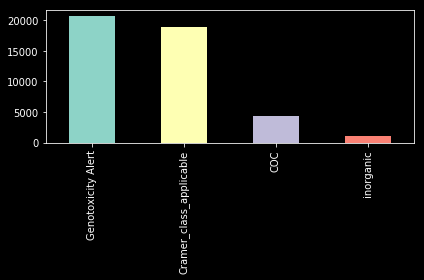

In [168]:
plt.style.use('dark_background')
temp3.final_TTC_category.value_counts(dropna = True).plot.bar()

plt.tight_layout()
plt.savefig('/share/home3/gpatlewi/python/Unilever/FDA/Output/new_TTC_category_counts.png')


In [169]:
writer = pd.ExcelWriter('/share/home3/gpatlewi/python/Unilever/FDA/Output/LRI_150819.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

temp3.to_excel(writer, sheet_name = 'final')



writer.save()